| freq(Hz) | 0.732 | 0.820 | 1.022 | 2.876 | 1.280 | 1.580 | 1.868 | 2.144 | 2.416 | 2.592 |
|----------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|

选取1.022,1.280,1.58,2.416,75mvpp

选取0.68，400mvpp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
omegap = np.sqrt(9.8/0.5)
omegas = np.sqrt(18.9/0.148)
th = np.zeros(15)
for k in range (0,15):
    th[k] = np.sqrt(np.square(omegap)+4*np.square(omegas)*np.square(np.sin(np.pi*k/30)))/(2*np.pi)
print(th)

[0.70460897 0.79865373 1.0275169  1.31606888 1.62389394 1.93163688
 2.2286284  2.50793181 2.76445557 2.99418637 3.19385591 3.36078935
 3.49283542 3.58833466 3.64610598]


[ 7.66557942  0.41533937 48.90566613]


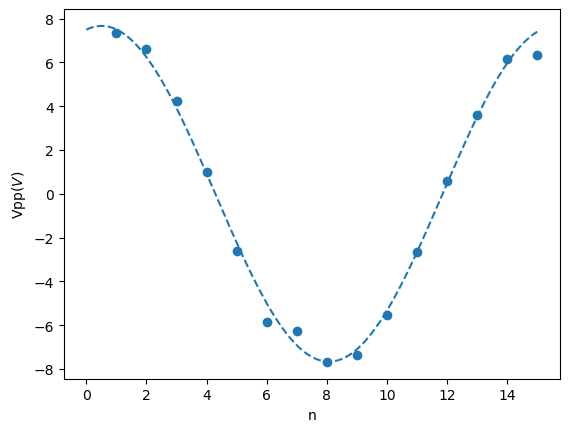

In [3]:
data1022 = pd.read_csv("data1022.csv")
def fitFunc(n, A, k, phi):
    return A * np.sin(k * n - phi)
params1022, _ = sp.optimize.curve_fit(fitFunc, data1022['no'], data1022['v'], bounds=([7,0.2,0], [10,0.5,100]))
print(params1022)
xAxis = np.linspace(0,15,1000)
fig0, ax = plt.subplots()
ax.scatter(data1022['no'],data1022['v'])
ax.plot(xAxis, fitFunc(xAxis, params1022[0], params1022[1], params1022[2]), linestyle='--')
ax.set_xlabel('n')
ax.set_ylabel('Vpp($V$)')
plt.savefig("1022.pdf")

[ 2.37715863  0.6271742  -1.27711059]


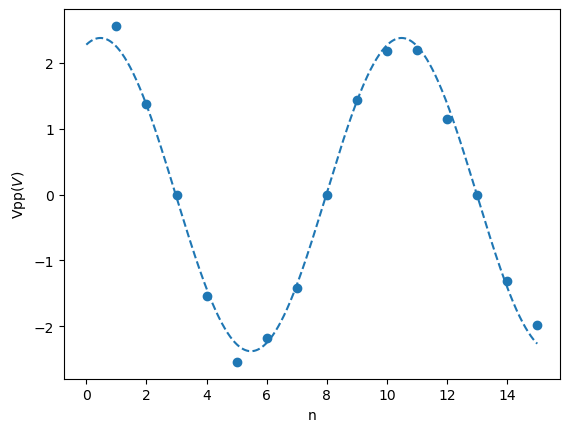

In [4]:
data1280 = pd.read_csv("data1280.csv")
params1280, _ = sp.optimize.curve_fit(fitFunc, data1280['no'], data1280['v'])
print(params1280)
fig0, ax = plt.subplots()
ax.scatter(data1280['no'],data1280['v'])
ax.plot(xAxis, fitFunc(xAxis, params1280[0], params1280[1], params1280[2]), linestyle='--')
ax.set_xlabel('n')
ax.set_ylabel('Vpp($V$)')
plt.savefig("1280.pdf")

[ 2.65354416  0.8366204  -1.14592744]


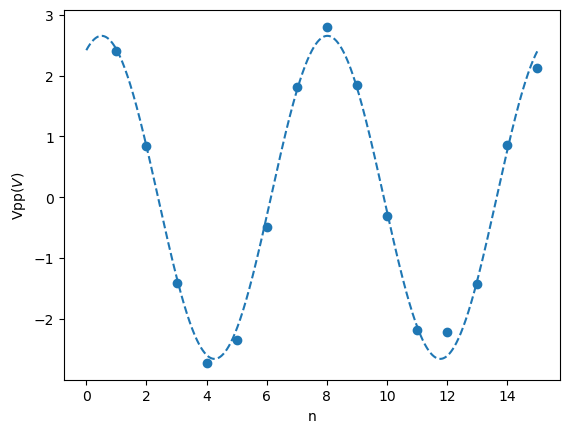

In [5]:
data1580 = pd.read_csv("data1580.csv")
params1580, _ = sp.optimize.curve_fit(fitFunc, data1580['no'], data1580['v'])
print(params1580)
fig0, ax = plt.subplots()
ax.scatter(data1580['no'],data1580['v'])
ax.plot(xAxis, fitFunc(xAxis, params1580[0], params1580[1], params1580[2]), linestyle='--')
ax.set_xlabel('n')
ax.set_ylabel('Vpp($V$)')
plt.savefig("1580.pdf")

[ 3.59688502  1.2488956  49.25032489]


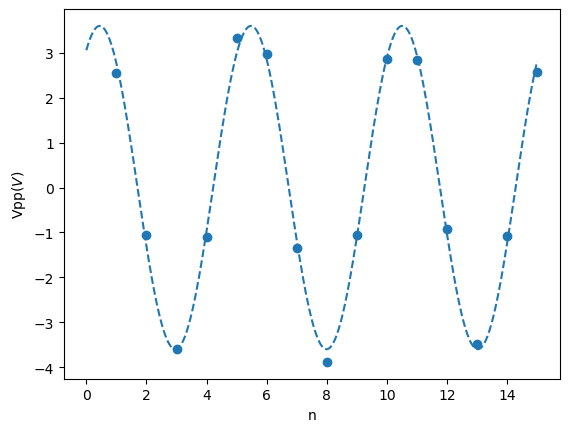

In [6]:
data2144 = pd.read_csv("data2144.csv")
params2144, _ = sp.optimize.curve_fit(fitFunc, data2144['no'], data2144['v'], bounds=([2.5,0.8,0], [4,1.5,100]))
print(params2144)
fig0, ax = plt.subplots()
ax.scatter(data2144['no'],data2144['v'])
ax.plot(xAxis, fitFunc(xAxis, params2144[0], params2144[1], params2144[2]), linestyle='--')
ax.set_xlabel('n')
ax.set_ylabel('Vpp($V$)')
plt.savefig("2144.pdf")

[470.11278449  20.73937125] 
 [[1.         0.99995807]
 [0.99995807 1.        ]]


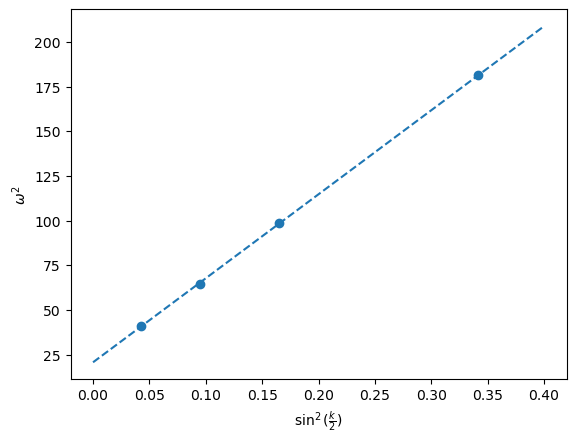

In [7]:
kArray = np.array([params1022[1],params1280[1],params1580[1],params2144[1]])
omegaSq = [(2*np.pi*1.022)**2, (2*np.pi*1.280)**2, (2*np.pi*1.580)**2, (2*np.pi*2.144) **2]
params = np.polyfit(np.square(np.sin(kArray/2)), omegaSq, 1)
corr = np.corrcoef(np.square(np.sin(kArray/2)), omegaSq)
print(params,'\n',corr)
fig0, ax = plt.subplots()
ax.scatter(np.square(np.sin(kArray/2)),omegaSq)
xAxis = np.linspace(0,0.4)
ax.plot(xAxis, params[0]*xAxis+params[1], linestyle='--')
ax.set_xlabel("$\\sin^2(\\frac{k}{2})$")
ax.set_ylabel("$\\omega^2$")
plt.savefig("sin-omega.pdf")

[2.90359703 0.12644089]


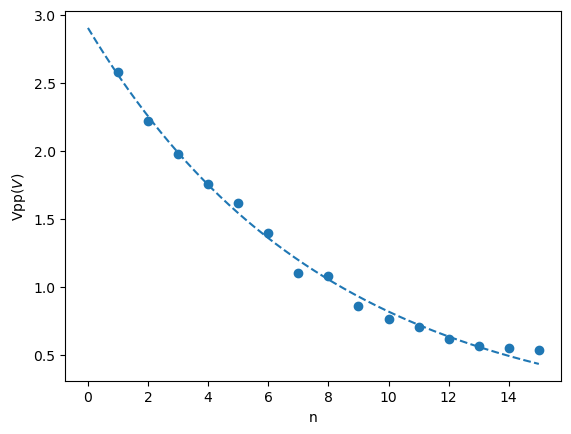

In [8]:
data0680 = pd.read_csv("data0680.csv")
def fitFuncExp(n, A, b):
    return A * np.exp(-b*n)
params0680, _ = sp.optimize.curve_fit(fitFuncExp, data0680['no'], data0680['v'])
print(params0680)
fig0, ax = plt.subplots()
xAxis = np.linspace(0,15,1000)
ax.scatter(data0680['no'],data0680['v'])
ax.plot(xAxis,fitFuncExp(xAxis, params0680[0], params0680[1]), linestyle='--')
ax.set_xlabel('n')
ax.set_ylabel('Vpp($V$)')
plt.savefig("0680.pdf")

[-0.12050114  1.02741854] 
 [[ 1.         -0.99177614]
 [-0.99177614  1.        ]]


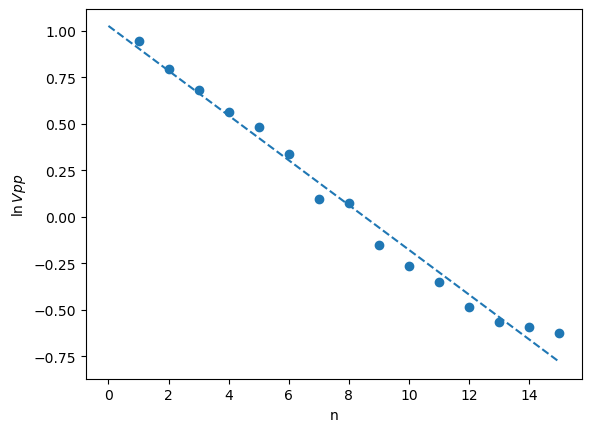

In [9]:
ln0680v = np.log(data0680['v'])
params = np.polyfit(data0680['no'], ln0680v, 1)
corr = np.corrcoef(data0680['no'], ln0680v)
print(params,'\n',corr)
fig0, ax = plt.subplots()
ax.scatter(data0680['no'], ln0680v)
ax.plot(xAxis, params[0]*xAxis+params[1], linestyle='--')
ax.set_xlabel("n")
ax.set_ylabel("$\\ln{Vpp}$")
plt.savefig("0680fit.pdf")